<a href="https://colab.research.google.com/github/umleeho1/AI_learning/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#생선 분류문제

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

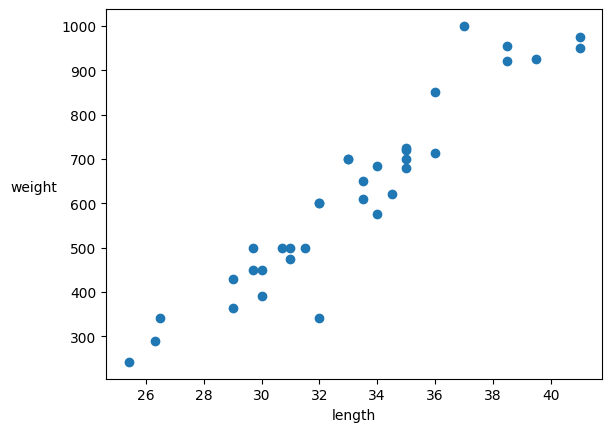

In [ ]:
import matplotlib.pyplot as plt #matplotlib의 pyplot함수를 plt로줄여사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight', rotation=0, labelpad=20)
plt.show()

In [ ]:
# 빙어 데이터 준비
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

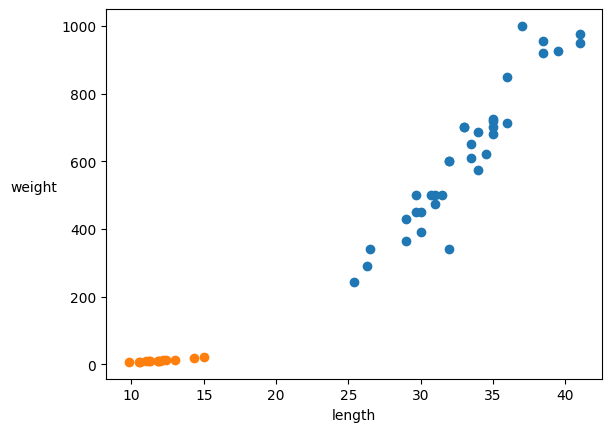

In [ ]:
# 도미 & 빙어 데이터 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight',rotation=0, labelpad=20)
plt.show()

In [ ]:
length = bream_length + smelt_length      # 두 개의 리스트를 이어붙인다!
weight = bream_weight + smelt_weight      # 이것도 이어붙이기! (단, length, weight가 pair로 들어가는 만큼, 순서가 중요함.)

fish_data = [[l, w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
print(len(bream_length))
print(len(smelt_length))
print(len(fish_data))

35
14
49


In [ ]:
# 정답 만들기 (도미=1, 빙어)
fish_target = [1] * len(bream_length) + [0] * len(smelt_length)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)  # 'n_neighbors' 매개변수로 이웃의 수를 지정합니다.
kn.fit(fish_data, fish_target)            # 모델 학습
kn.score(fish_data, fish_target)          # 정확도 계산


1.0

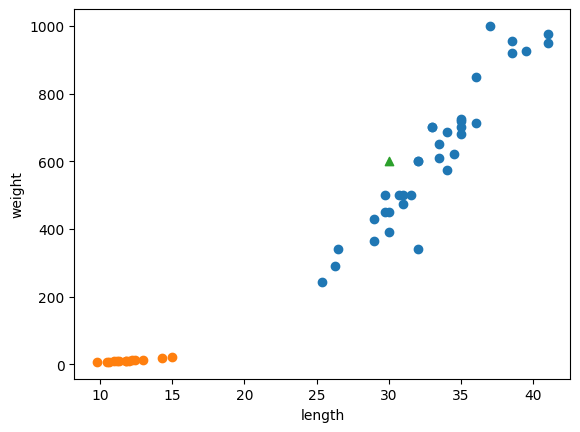

In [ ]:
# 새로운 데이터로 학습 결과 확인
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker="^")              # 사람은 바로 구별할 수 있음 (=> 데이터 상, 요건 도미다!)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 임의의 데이터를 넣고 결과 확인
print("length=30, weight=600 테스트 데이터의 예측 결과: ", kn.predict([[30, 600]]))

length=30, weight=600 테스트 데이터의 예측 결과:  [1]


In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)   # 보통 n_neighbors를 k 라고 부름!
kn49.fit(fish_data, fish_target)
print("정확도 : ", kn49.score(fish_data, fish_target))        # 정확도가 떨어졌습니다 ㅠㅠㅜㅠㅜㅜㅠ

정확도 :  0.7142857142857143


In [ ]:
# 정확하게 도미놈들만 맞췄네요.
print(35/49)        # 도미데이터수/전체데이터수

0.7142857142857143


In [ ]:
# 도미랑 빙어 데이터를 합친 데이터셋
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [ ]:
# 총 49개의 샘플(sample) 중 35개를 훈련세트, 14개를 테스트세트로 사용 (우선 직접 인덱싱 해봅시다)
train_input  = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(train_input, train_target))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(test_input, test_target))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  0.0


In [ ]:
from sklearn.model_selection import train_test_split
# test_size는 앞선 예시의 test 데이터셋과 개수를 동일하게 하기 위해 설정한겁니다. 이렇게까지 세세히 설정 안하고 그냥 0.3으로 하셔도 됩니다.
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.28, random_state=1024, shuffle=True, stratify=fish_target)

In [ ]:
print(f"학습데이터 수: {len(X_train)}, 테스트데이터 수: {len(X_test)}")

학습데이터 수: 35, 테스트데이터 수: 14


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(X_train, y_train)
print("Train 데이터셋에 대한 정확도(Train Accuracy): ", kn.score(X_train, y_train))
print("Test 데이터셋에 대한 정확도(Test Accuracy): ", kn.score(X_test, y_test))

Train 데이터셋에 대한 정확도(Train Accuracy):  1.0
Test 데이터셋에 대한 정확도(Test Accuracy):  1.0


In [ ]:
train_input, train_target, test_input, test_target = X_train, y_train, X_test, y_test

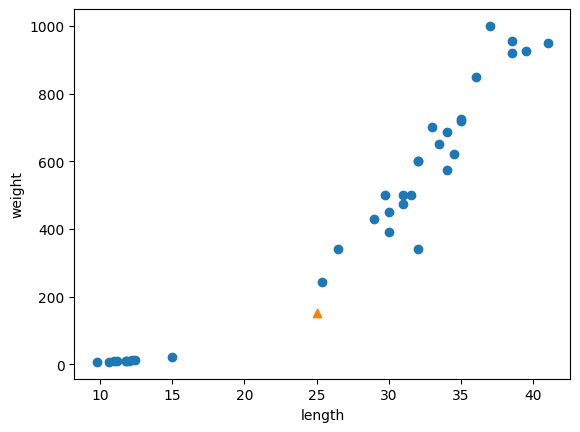

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14
X_train, X_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.28,
                                                    random_state=1024, shuffle=True, stratify=fish_target)
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(25, 150, marker='^')        # 새로운 데이터셋 (length=25, weight=150)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
# 넘파이 배열로 변환
import numpy as np

train_input, train_target, test_input, test_target = np.array(train_input), np.array(train_target), np.array(test_input), np.array(test_target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
train_input.shape

(35, 2)

In [ ]:
train_input

array([[  30. ,  450. ],
       [  38.5,  920. ],
       [  11.8,   10. ],
       [  38.5,  955. ],
       [  32. ,  600. ],
       [  11.2,    9.8],
       [  12. ,    9.8],
       [  32. ,  340. ],
       [  31.5,  500. ],
       [  37. , 1000. ],
       [  34. ,  685. ],
       [  33.5,  650. ],
       [  12.2,   12.2],
       [  31. ,  475. ],
       [  33. ,  700. ],
       [  34.5,  620. ],
       [  30. ,  390. ],
       [  25.4,  242. ],
       [  10.6,    7. ],
       [  29.7,  500. ],
       [  34. ,  575. ],
       [  15. ,   19.9],
       [  41. ,  950. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  26.5,  340. ],
       [  11.8,    9.9],
       [   9.8,    6.7],
       [  31. ,  500. ],
       [  11. ,    9.7],
       [  12.4,   13.4],
       [  29. ,  430. ],
       [  36. ,  850. ],
       [  35. ,  720. ],
       [  39.5,  925. ]])

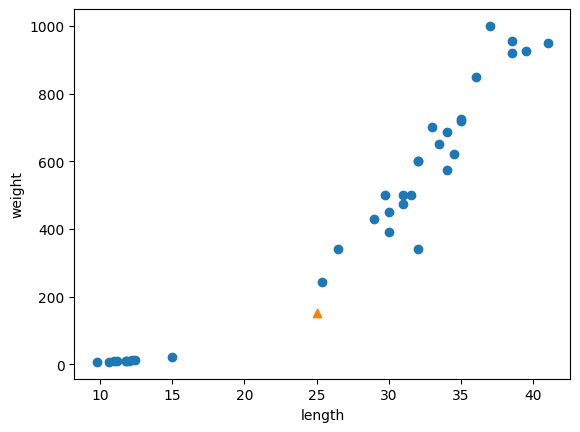

In [ ]:
# 새로운 데이터
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])         # 이런 인덱싱은 넘파이에서만!
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print("새로운 length=25, weight=150 데이터의 예측 결과: ", kn.predict([[25,150]]))

새로운 length=25, weight=150 데이터의 예측 결과:  [0]


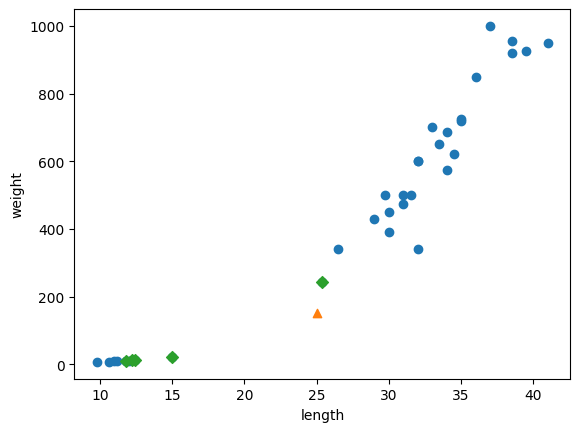

In [ ]:
# 디폴트 k=5, [25,150]과 최근접 이웃들의 거리와 데이터 인덱스를 얻어서 확인해보자! (즉, 새로운 데이터 예측의 단서)
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

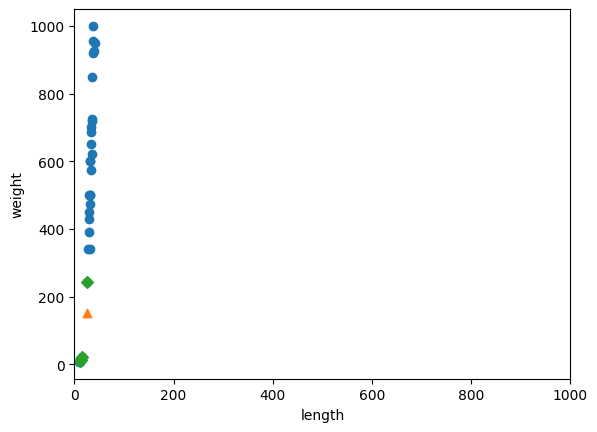

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))           # x축의 범위(limit)를 0~1000 사이로 맞춤
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# Standardization
import numpy as np
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

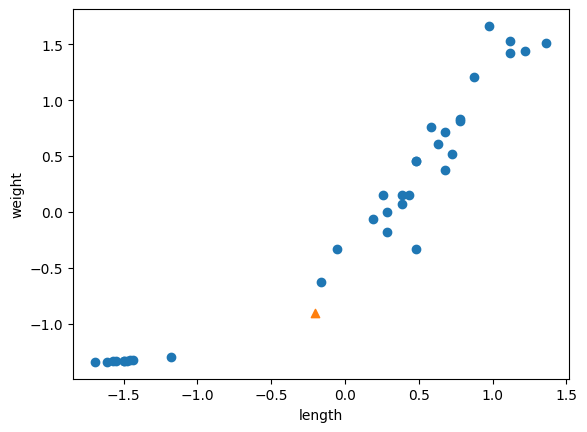

In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

train_scaled = (X_train - mean) / std
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도의 x,y축 범위가 -1.5~1.5 사이로 바뀌었다!

In [ ]:
print(mean, std)

[ 27.06857143 450.01142857] [ 10.21365393 330.28803341]


In [ ]:
train_input.shape

(35, 2)

In [ ]:
print("평균: ", mean)
print("표준편차: ", std)

평균:  [ 27.06857143 450.01142857]
표준편차:  [ 10.21365393 330.28803341]


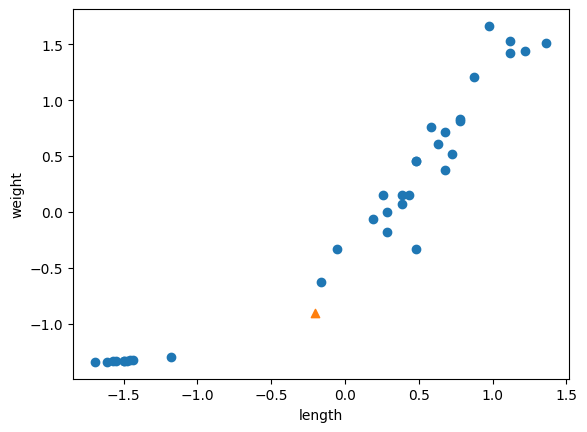

In [ ]:
train_scaled = (train_input - mean) / std
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도의 x,y축 범위가 -1.5~1.5 사이로 바뀌었다!

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input-mean) / std

print(kn.score(test_scaled, test_target))

1.0


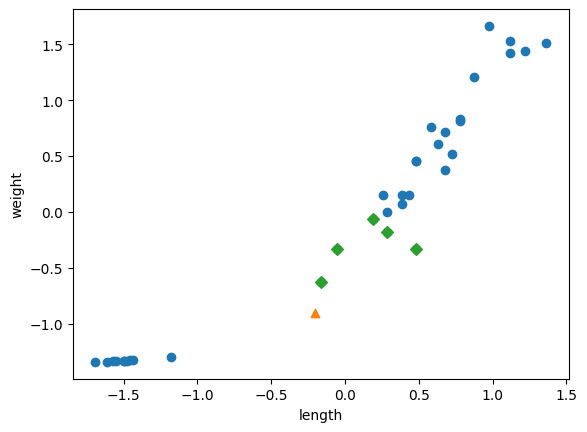

In [ ]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 농어의 길이와 무게 데이터
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

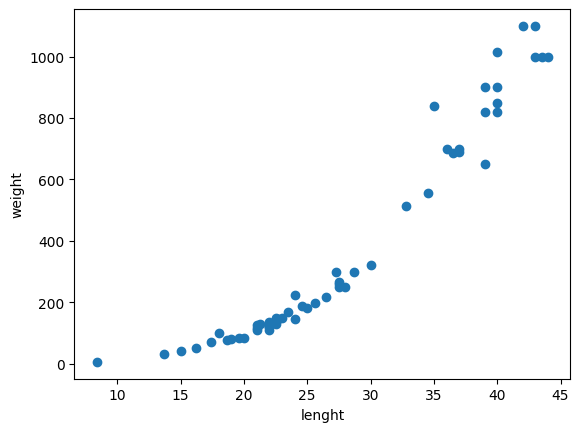

In [ ]:
# 농어 데이터 시각화
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [ ]:
# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))   # 결정계수

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)          # 평균적으로 19g 정도 target 값과 다르다!

19.157142857142862


In [ ]:
# Train 결정계수
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# Train MAE
train_prediction = knr.predict(train_input)
mae = mean_absolute_error(train_target, train_prediction)
print(mae)

35.76190476190476


In [ ]:
# 모델을 좀 더 국지적 패턴에 민감하도록 만들어보자(데이터셋이....적으니까...또르르..)

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print("결정계수(train) : ", knr.score(train_input, train_target))
print("결정계수(test) : ", knr.score(test_input, test_target))

결정계수(train) :  0.9804899950518966
결정계수(test) :  0.9746459963987609


In [ ]:
# 농어의 길이와 무게 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

# 모델 세팅


(42, 1) (14, 1)


길이 50일 때 예측 무게 :  [1033.33333333]
길이 100일 때 예측 무게 :  [1033.33333333]



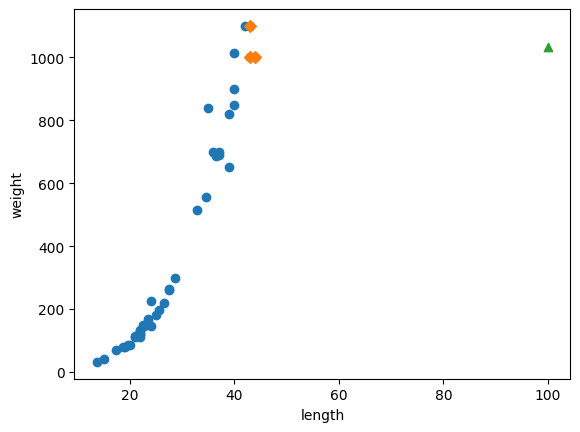

In [ ]:
# KNN 회귀 알고리즘의 한계
print("길이 50일 때 예측 무게 : ", knr.predict([[50]]))
print("길이 100일 때 예측 무게 : ", knr.predict([[100]]))
print()


distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print("길이 50일 때 예측 무게 : ", lr.predict([[50]]))
print("길이 100일 때 예측 무게 : ", lr.predict([[100]]))

길이 50일 때 예측 무게 :  [1241.83860323]
길이 100일 때 예측 무게 :  [3192.69585141]


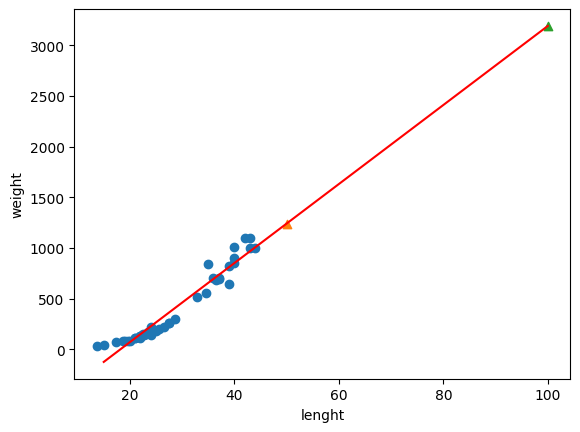

In [ ]:
# 그래프로 그려보자요
plt.scatter(train_input, train_target)

plt.plot([15, 100], [15*lr.coef_ + lr.intercept_, 100*lr.coef_ + lr.intercept_], color="r")
plt.scatter(50, lr.predict([[50]]), marker="^")
plt.scatter(100, lr.predict([[100]]), marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

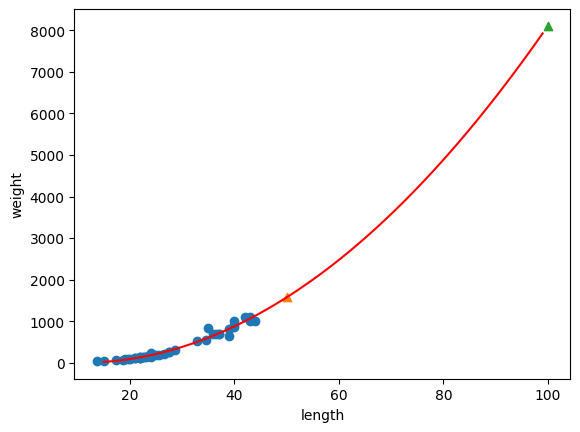

In [ ]:
# 시각화
point = np.arange(15, 100)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, color="r")
plt.scatter(50, lr.predict([[50**2,50]]), marker="^")
plt.scatter(100, lr.predict([[100**2,100]]), marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()       # 처음 5개의 행 추출

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print("물고기 종류(Species): ", pd.unique(fish['Species']))

물고기 종류(Species):  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[fish.columns.difference(['Species'])]
print(fish_input[:5])
print(fish_input.shape)

   Diagonal   Height  Length  Weight   Width
0      30.0  11.5200    25.4   242.0  4.0200
1      31.2  12.4800    26.3   290.0  4.3056
2      31.1  12.3778    26.5   340.0  4.6961
3      33.5  12.7300    29.0   363.0  4.4555
4      34.0  12.4440    29.0   430.0  5.1340
(159, 5)


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])
print(fish_target.shape)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
(159,)


In [ ]:
# 훈련셋 테스트셋 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print("train set accuracy: ", kn.score(train_scaled, train_target))
print("test set accuracy: ", kn.score(test_scaled, test_target))

train set accuracy:  0.8907563025210085
test set accuracy:  0.85


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))    # 소숫점 네 번째 자리까지 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[:5])
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']
 ['Smelt' 'Smelt' 'Smelt']
 ['Pike' 'Pike' 'Pike']
 ['Roach' 'Perch' 'Perch']
 ['Perch' 'Perch' 'Roach']]


In [ ]:
# 이진 분류를 위해 클래스 2개만 추출 (도미, 빙어)
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
train_bream_smelt.shape

(33, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
# 모델 파라미터
print(lr.coef_, lr.intercept_)

[[-0.66280298 -1.01290277 -0.57620209 -0.4037798  -0.73168947]] [-2.16155132]


In [ ]:
from scipy.special import expit
decisions = lr.decision_function(train_bream_smelt[:5])    # output y 값
print(expit(decisions))             # expit: 시그모이드 함수

# lr.predict_proba 결과의 두번째 열과 동일!

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)    # default: C=1, max_iter=100
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print()
print(lr.classes_)
print(np.round(proba, decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

# (클래수 개수=7, 특성(feature)=5)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
print()

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12780912.07it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 203476.47it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3784090.50it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23598116.93it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [ ]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

<Axes: >

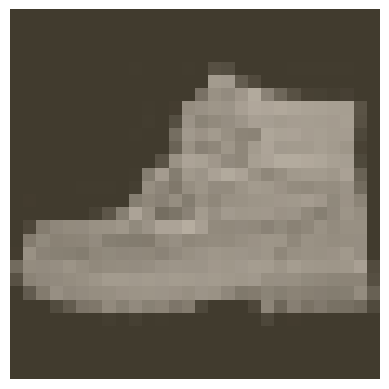

In [ ]:
image, label = next(iter(trainloader))
imshow(image[0,:])

In [ ]:
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 50
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # for 문이 끝나면 실행한다.
    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        # 자동 미분을 꺼서 pytorch가 쓸 떼 없는 짓을 안하게 한다. (어차피 test set에서 하는 작업이므로)
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                # 로그 확률에 지수 적용
                ps = torch.exp(log_ps)
                # topk는 k번째로 큰 숫자를 찾아내는 것이다.
                # dim=1 는 dimension을 의미한다.
                top_p, top_class = ps.topk(1, dim=1)
                # labels를 top_class와 똑같은 형태로 만든다음에, 얼마나 같은게 있는지 확인한다.
                equals = top_class == labels.view(*top_class.shape)
                # equals를 float으로 바꾸고 평균 정확도를 구한다.
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/50..  Training Loss: 0.520..  Test Loss: 0.438..  Test Accuracy: 0.841
Epoch: 2/50..  Training Loss: 0.388..  Test Loss: 0.402..  Test Accuracy: 0.854
Epoch: 3/50..  Training Loss: 0.353..  Test Loss: 0.394..  Test Accuracy: 0.858
Epoch: 4/50..  Training Loss: 0.331..  Test Loss: 0.386..  Test Accuracy: 0.859
Epoch: 5/50..  Training Loss: 0.315..  Test Loss: 0.421..  Test Accuracy: 0.858
Epoch: 6/50..  Training Loss: 0.301..  Test Loss: 0.383..  Test Accuracy: 0.866
Epoch: 7/50..  Training Loss: 0.291..  Test Loss: 0.384..  Test Accuracy: 0.869
Epoch: 8/50..  Training Loss: 0.280..  Test Loss: 0.382..  Test Accuracy: 0.871
Epoch: 9/50..  Training Loss: 0.273..  Test Loss: 0.354..  Test Accuracy: 0.881
Epoch: 10/50..  Training Loss: 0.262..  Test Loss: 0.362..  Test Accuracy: 0.878
Epoch: 11/50..  Training Loss: 0.255..  Test Loss: 0.388..  Test Accuracy: 0.875
Epoch: 12/50..  Training Loss: 0.257..  Test Loss: 0.373..  Test Accuracy: 0.874
Epoch: 13/50..  Training Loss: 0.247.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.resize_(1, 784)
ps = torch.exp(model(img))
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

AttributeError: ignored

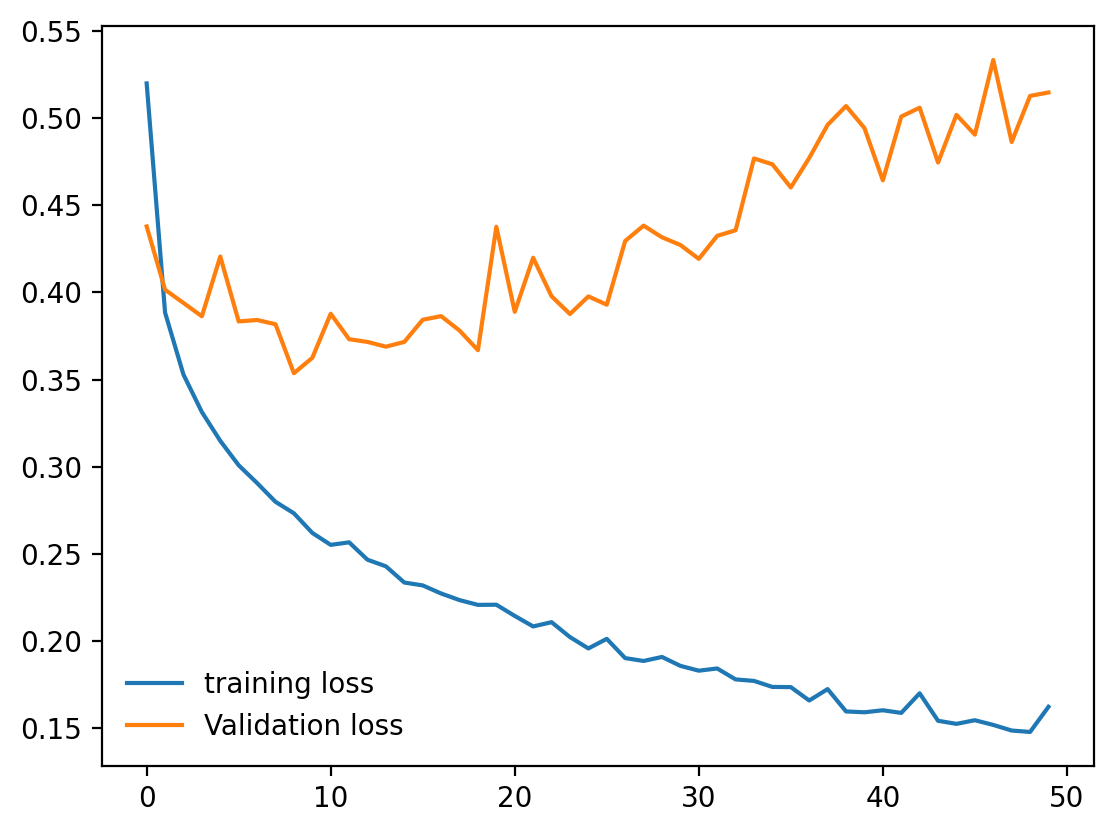

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)


In [ ]:
# Dropout 넣어서 수정해보자
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # 0.2정도를 무작위로 골라 dropout한다.
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output은 dropout하면 안된다..
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
# 다시학습...

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 50
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            # test 과정에 들어간다. dropout을 안하게 된다.
            # 정확하게 말하면, dropout 하는 비율이 0이 된다.
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # 다시 트레이닝 과정으로 돌아간다.
        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/50..  Training Loss: 0.605..  Test Loss: 0.469..  Test Accuracy: 0.833
Epoch: 2/50..  Training Loss: 0.482..  Test Loss: 0.430..  Test Accuracy: 0.849
Epoch: 3/50..  Training Loss: 0.454..  Test Loss: 0.434..  Test Accuracy: 0.841
Epoch: 4/50..  Training Loss: 0.430..  Test Loss: 0.423..  Test Accuracy: 0.845
Epoch: 5/50..  Training Loss: 0.422..  Test Loss: 0.416..  Test Accuracy: 0.855
Epoch: 6/50..  Training Loss: 0.410..  Test Loss: 0.402..  Test Accuracy: 0.864
Epoch: 7/50..  Training Loss: 0.404..  Test Loss: 0.405..  Test Accuracy: 0.854
Epoch: 8/50..  Training Loss: 0.399..  Test Loss: 0.403..  Test Accuracy: 0.856
Epoch: 9/50..  Training Loss: 0.395..  Test Loss: 0.396..  Test Accuracy: 0.860
Epoch: 10/50..  Training Loss: 0.385..  Test Loss: 0.387..  Test Accuracy: 0.863
Epoch: 11/50..  Training Loss: 0.383..  Test Loss: 0.377..  Test Accuracy: 0.870
Epoch: 12/50..  Training Loss: 0.381..  Test Loss: 0.385..  Test Accuracy: 0.869
Epoch: 13/50..  Training Loss: 0.380.

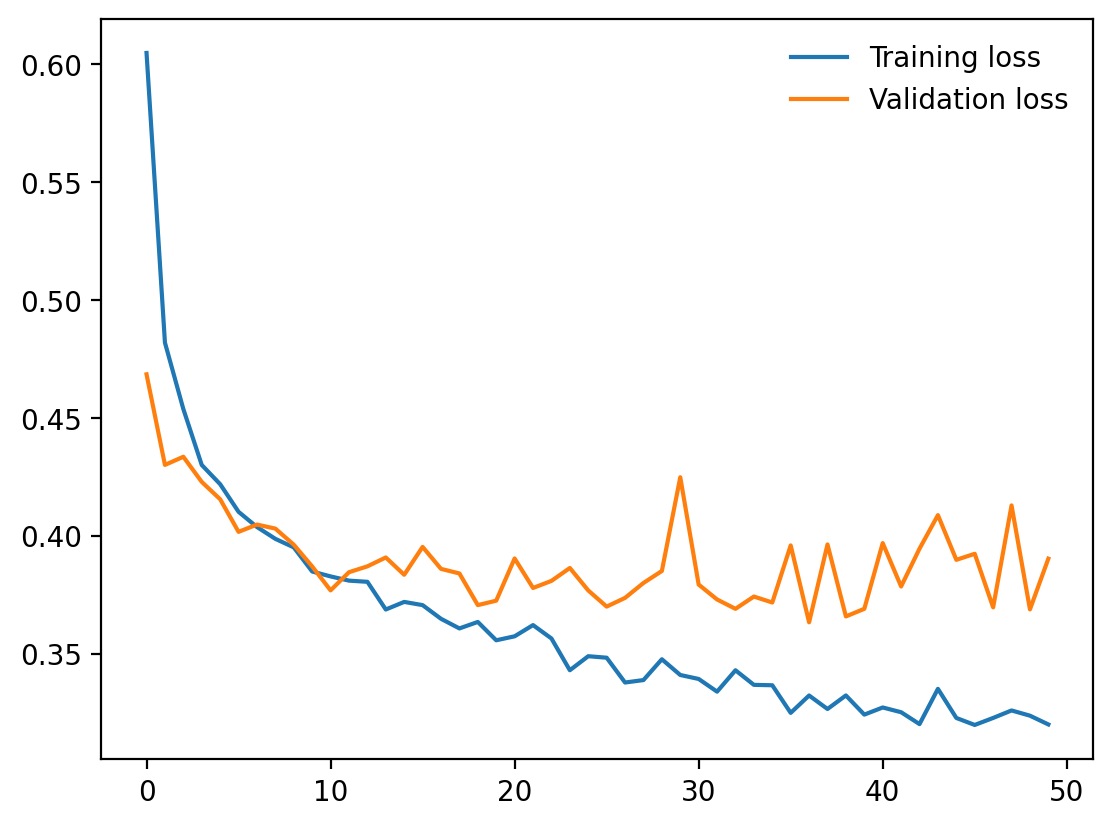

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)